In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

In [2]:
res = np.loadtxt("res_diff.txt")

print(res.shape)

time = 9

res = res.reshape((time+1, 1000, 256))

(10000, 256)


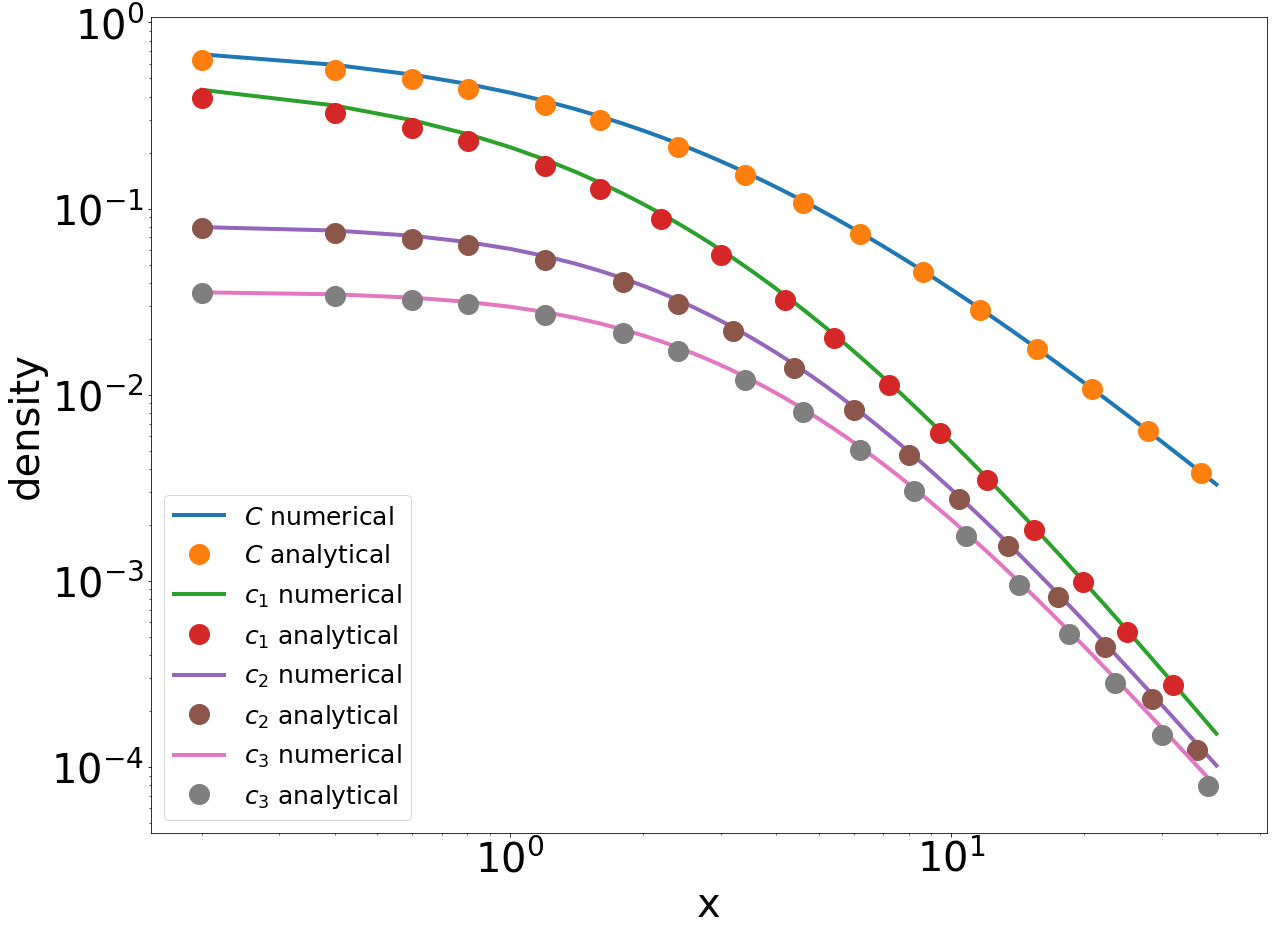

In [3]:
J = 1.0
x = np.linspace(0.0, 200, 1000)
l = (24.0/J)**(1./3.)



lasty = -800
firsty = 1
def formula(l, k, x):
    return 12*l/gamma(1./3.)*k**(-2./3.)*np.power(x,-3)
    

plt.figure(figsize=(20,15))
plt.plot(x[firsty:lasty], res[time][firsty:lasty].sum(axis=1), label='$C$ numerical', lw=4)
plt.plot(x[firsty:lasty], (6. / (x + l)**2)[firsty:lasty], 'o', label='$C$ analytical', lw=4, markersize=20, markevery=0.05)

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 0], label='$c_1$ numerical', lw=4)
plt.plot(x[firsty:lasty], (4.*l / (x + l)**3) [firsty:lasty], 'o', label = '$c_1$ analytical', lw=4, markersize=20, markevery=0.05)

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 1], label='$c_2$ numerical', lw=4)
plt.plot(x[firsty:lasty], ((8./3.*l / (x + l)**3)- 2.*l*l/(x+l)**4)[firsty:lasty], 'o', label = '$c_2$ analytical', lw=4, markersize=20, markevery=0.05)

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 2], label='$c_3$ numerical', lw=4)
plt.plot(x[firsty:lasty], ((56./27.*l / (x + l)**3) - 8./3.*l*l/(x+l)**4 + 8./9.*l*l*l/(x+l)**5)[firsty:lasty], 'o', label = '$c_3$ analytical', lw=4, markersize=20, markevery=0.05)

#plt.title("Steady state solution of Diffusion-Coagulation system", fontsize=30)
plt.xticks(fontsize=40)
ax = plt.gca()
ax.tick_params(axis='both', which='minor', labelsize=40)
plt.xlabel("x", fontsize=40)
plt.xscale('log')
plt.yticks(fontsize=40)
plt.ylabel("density", fontsize=40)
plt.yscale('log')
plt.legend(fontsize=25)

In [5]:
res = np.loadtxt("res_adv.txt")

print(res.shape)

res = res.reshape((10, 1000, 128))

(10000, 128)


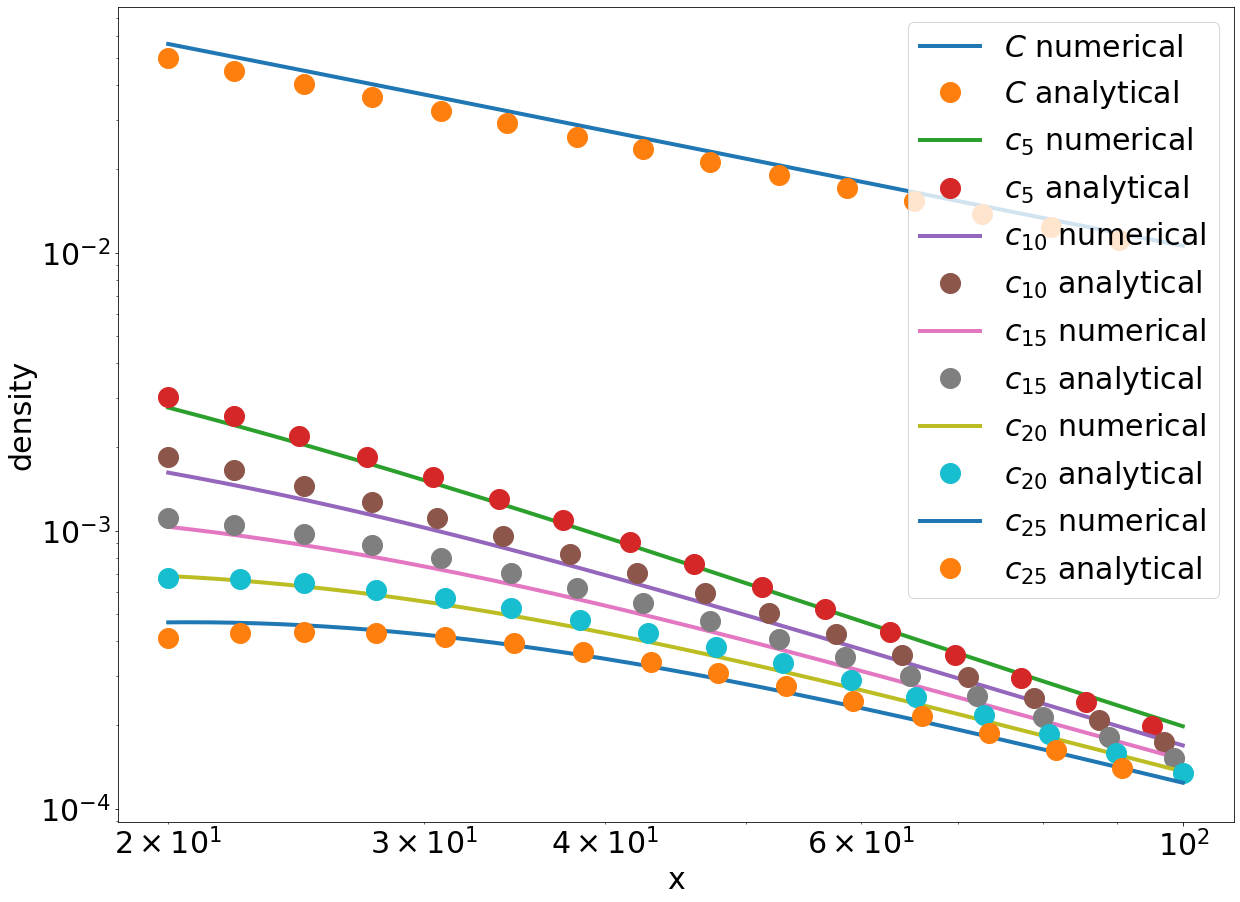

In [6]:
J = 1.0
V = 1.0
K = 1.0
x = np.linspace(0.00001, 200, 1000)

time = 9
lasty = -500
firsty = 100
def formula(k, x):
    return 2*V**3/(J*K**2)*np.power(x,-2)*np.exp(-2*V**2/(J*K)*k/x)
    

plt.figure(figsize=(20,15))

plt.plot(x[firsty:lasty], res[time][firsty:lasty].sum(axis=1), label='$C$ numerical', lw=4)
plt.plot(x[firsty:lasty], (V/(K*x))[firsty:lasty], 'o', label='$C$ analytical', lw=4, markersize=20, markevery=0.05)

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 5], label='$c_{5}$ numerical', lw=4)
plt.plot(x[firsty:lasty], formula(5, x)[firsty:lasty], 'o', label='$c_{5}$ analytical', lw=4, markersize=20, markevery=0.05)

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 10], label='$c_{10}$ numerical', lw=4)
plt.plot(x[firsty:lasty], formula(10, x)[firsty:lasty], 'o', label='$c_{10}$ analytical', lw=4, markersize=20, markevery=0.05)

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 15], label='$c_{15}$ numerical', lw=4)
plt.plot(x[firsty:lasty], formula(15, x)[firsty:lasty], 'o', label='$c_{15}$ analytical', lw=4, markersize=20, markevery=0.05)

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 20], label='$c_{20}$ numerical', lw=4)
plt.plot(x[firsty:lasty], formula(20, x)[firsty:lasty], 'o', label='$c_{20}$ analytical', lw=4, markersize=20, markevery=0.05)

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 25], label='$c_{25}$ numerical', lw=4)
plt.plot(x[firsty:lasty], formula(25, x)[firsty:lasty], 'o', label='$c_{25}$ analytical', lw=4, markersize=20, markevery=0.05)

#plt.title("Steady state solution of Advection-Diffusion-Coagulation system", fontsize=30)
plt.xticks(fontsize=30)
ax = plt.gca()
ax.tick_params(axis='both', which='minor', labelsize=30)
plt.xlabel("x", fontsize=30)
plt.xscale('log')
plt.yticks(fontsize=30)
plt.ylabel("density", fontsize=30)
plt.yscale('log')
plt.legend(fontsize=30, loc='upper right')
plt.savefig("diffusion_advection_const.png")

In [17]:
res = np.loadtxt("res_full.txt")

print(res.shape)

n = 256
t = 5
num=t
res = res.reshape((t+1, 5000, n))

(30000, 256)


In [18]:
from copy import deepcopy

In [25]:
res_n = deepcopy(res)
for j in range(num+1):
    for i in range(n):
        res_n[j][:, i] = (i)**(5./3.)*res_n[j][:,i]

In [31]:
res_m = deepcopy(res)
for j in range(num+1):
    for i in range(n):
        res_m[j][:, i] = (i+1)*res_m[j][:,i]

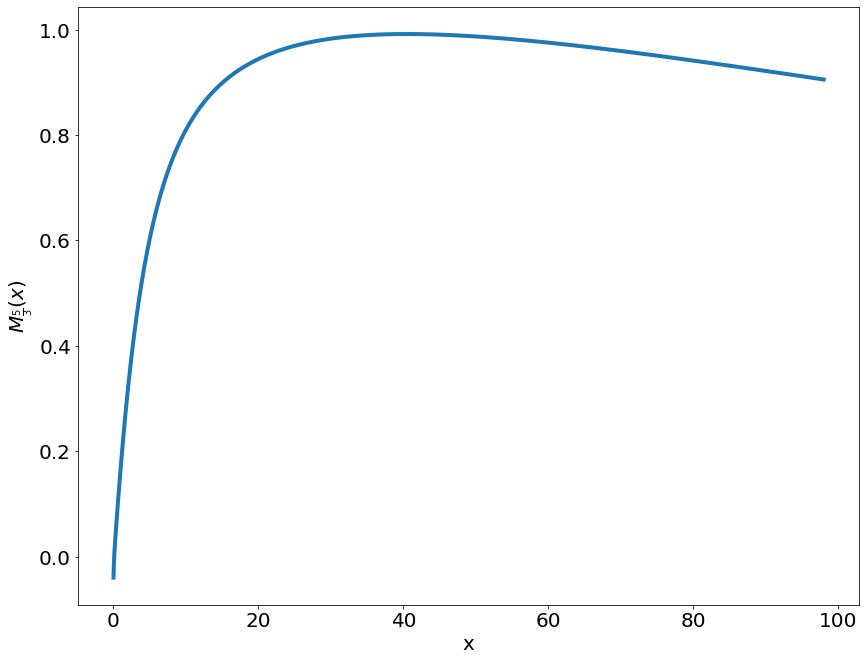

In [27]:
plt.figure(figsize=(14,11))
x = np.linspace(0.000000001, 100, 5000)

plt.xlabel("x", fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("$M_{\\frac{5}{3}}(x)$", fontsize=20)
plt.yticks(fontsize=20)
plt.plot(x[0:-100],res_n[num][0:-100].sum(axis=1), lw=4)
#plt.ylim([0,1.5])

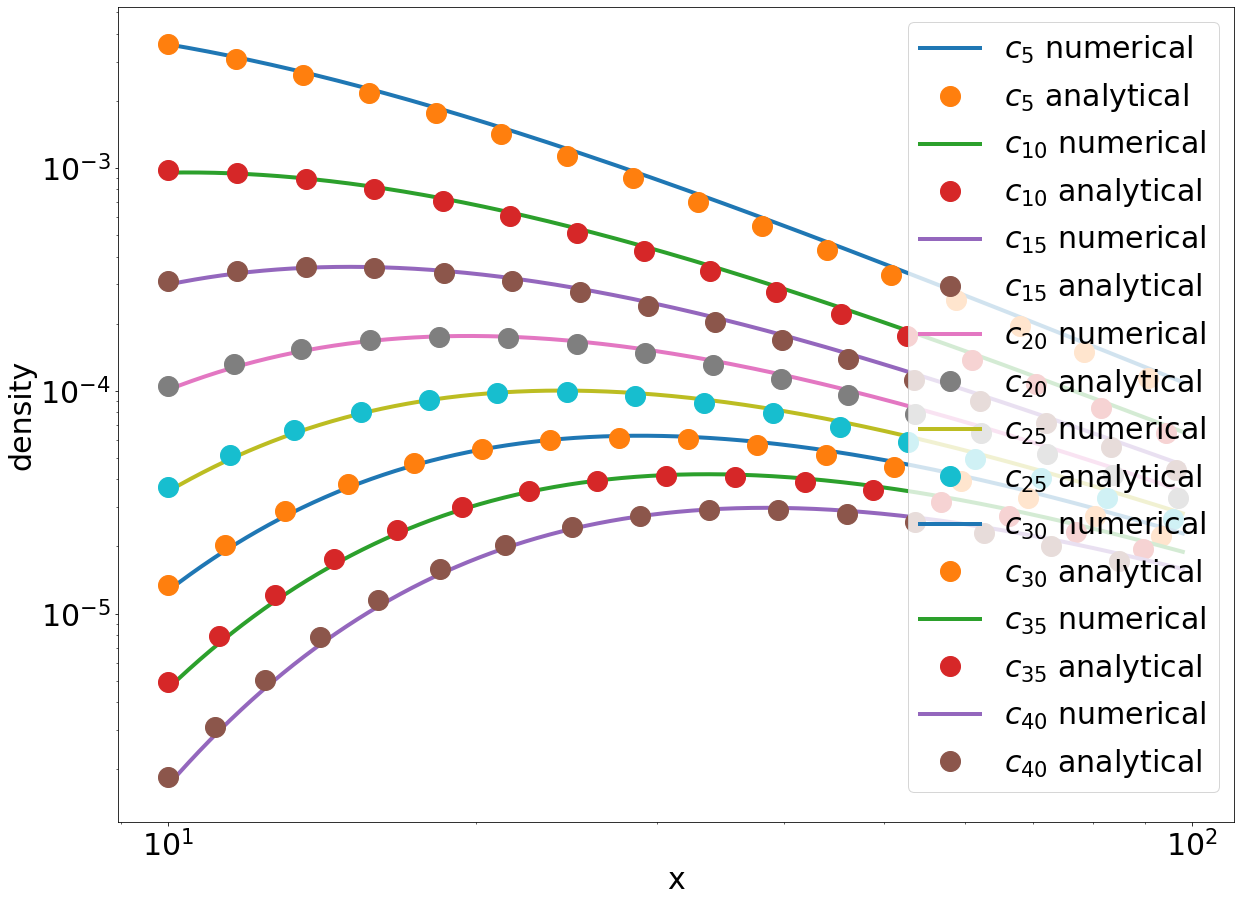

In [23]:
J = 1.0
V = 1.0
K = 1.0
x = np.linspace(0.000000001, 100, 5000)

time = t

lasty = -100
firsty = 500
#lasty=-1
#firsty=0

def formula(k, x, cond, sc=1.8):
    return np.power(x, -8./3.)*f((k+1)/x, cond, sc)*3.5

def f(eps, cond, sc):
    if cond:
        return np.exp(-sc*np.power(eps, -2./3.))
    else:
        return np.power(eps, -2./3.)*np.exp(-sc*eps) 

plt.figure(figsize=(20,15))

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 5], label='$c_{5}$ numerical', lw=4)
plt.plot(x[firsty:lasty], formula(5, x, False)[firsty:lasty], 'o', label='$c_{5}$ analytical', lw=4, markersize=20, markevery=0.05)


plt.plot(x[firsty:lasty], res[time][firsty:lasty, 10], label='$c_{10}$ numerical', lw=4)
plt.plot(x[firsty:lasty], formula(10, x, False)[firsty:lasty], 'o', label='$c_{10}$ analytical', lw=4, markersize=20, markevery=0.05)

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 15], label='$c_{15}$ numerical', lw=4)
plt.plot(x[firsty:lasty], formula(15, x, False)[firsty:lasty], 'o', label='$c_{15}$ analytical', lw=4, markersize=20, markevery=0.05)

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 20], label='$c_{20}$ numerical', lw=4)
plt.plot(x[firsty:lasty], formula(20, x, False)[firsty:lasty], 'o', label='$c_{20}$ analytical', lw=4, markersize=20, markevery=0.05)

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 25], label='$c_{25}$ numerical', lw=4)
plt.plot(x[firsty:lasty], formula(25, x, False)[firsty:lasty], 'o', label='$c_{25}$ analytical', lw=4, markersize=20, markevery=0.05)

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 30], label='$c_{30}$ numerical', lw=4)
plt.plot(x[firsty:lasty], formula(30, x, False)[firsty:lasty], 'o', label='$c_{30}$ analytical', lw=4, markersize=20, markevery=0.05)


plt.plot(x[firsty:lasty], res[time][firsty:lasty, 35], label='$c_{35}$ numerical', lw=4)
plt.plot(x[firsty:lasty], formula(35, x, False)[firsty:lasty], 'o', label='$c_{35}$ analytical', lw=4, markersize=20, markevery=0.05)

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 40], label='$c_{40}$ numerical', lw=4)
plt.plot(x[firsty:lasty], formula(40, x, False)[firsty:lasty], 'o', label='$c_{40}$ analytical', lw=4, markersize=20, markevery=0.05)



#plt.title("Steady state solution of Advection-Diffusion-Coagulation system", fontsize=30)
plt.xticks(fontsize=30)
ax = plt.gca()
ax.tick_params(axis='both', which='minor', labelsize=30)
plt.xlabel("x", fontsize=30)
plt.xscale('log')
plt.yticks(fontsize=30)
plt.ylabel("density", fontsize=30)
plt.yscale('log')
plt.legend(fontsize=30, loc='upper right')
plt.savefig("diffusion_advection_const.png")

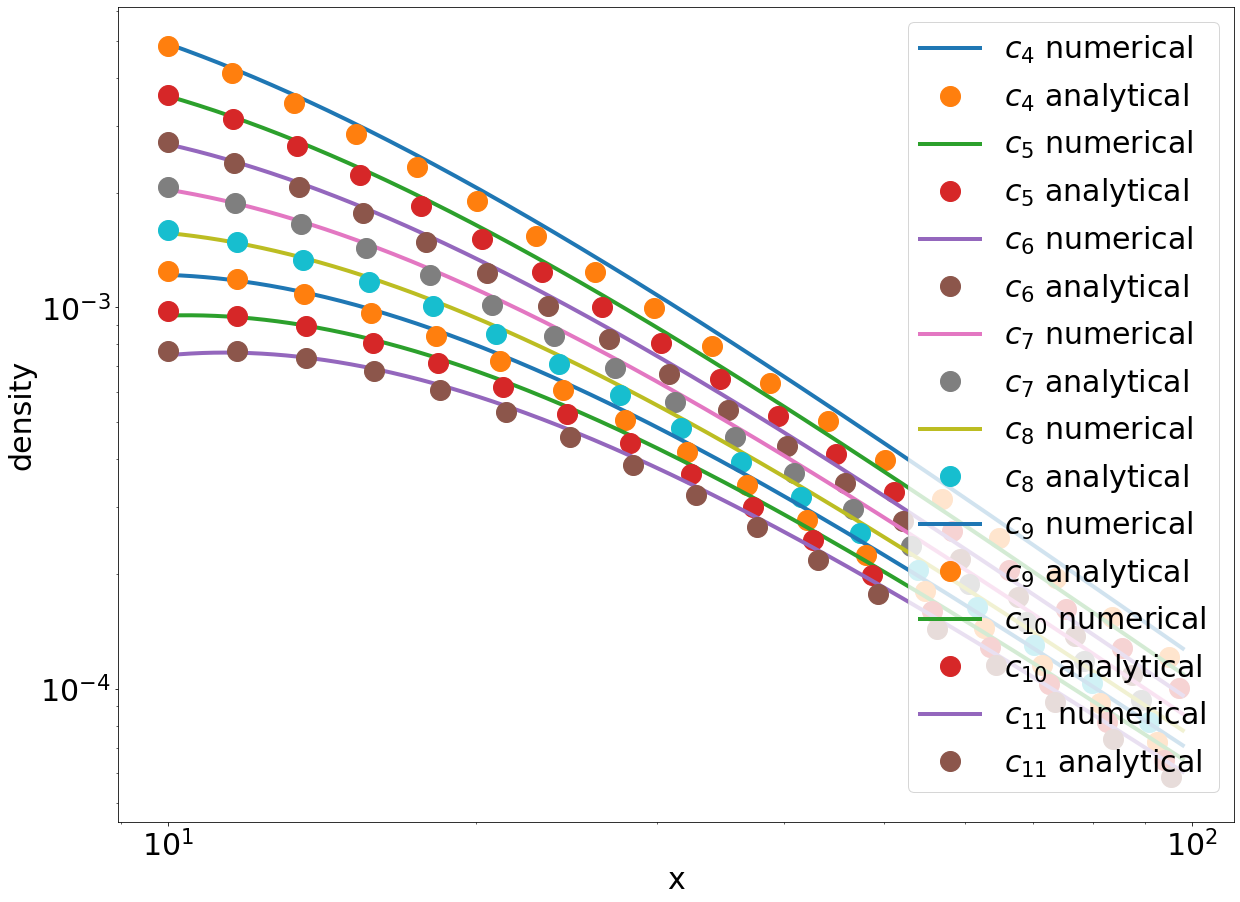

In [14]:
J = 1.0
V = 1.0
K = 1.0
x = np.linspace(0.000000001, 100, 5000)

time = t

lasty = -100
firsty = 500
#lasty=-1
#firsty=0

def formula(k, x, cond, sc=1.8):
    return np.power(x, -8./3.)*f((k+1)/x, cond, sc)*3.5

def f(eps, cond, sc):
    if cond:
        return np.exp(-sc*np.power(eps, -2./3.))
    else:
        return np.power(eps, -2./3.)*np.exp(-sc*eps) 

plt.figure(figsize=(20,15))

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 4], label='$c_{4}$ numerical', lw=4)
plt.plot(x[firsty:lasty], formula(4, x, False)[firsty:lasty], 'o', label='$c_{4}$ analytical', lw=4, markersize=20, markevery=0.05)


plt.plot(x[firsty:lasty], res[time][firsty:lasty, 5], label='$c_{5}$ numerical', lw=4)
plt.plot(x[firsty:lasty], formula(5, x, False)[firsty:lasty], 'o', label='$c_{5}$ analytical', lw=4, markersize=20, markevery=0.05)

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 6], label='$c_{6}$ numerical', lw=4)
plt.plot(x[firsty:lasty], formula(6, x, False)[firsty:lasty], 'o', label='$c_{6}$ analytical', lw=4, markersize=20, markevery=0.05)

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 7], label='$c_{7}$ numerical', lw=4)
plt.plot(x[firsty:lasty], formula(7, x, False)[firsty:lasty], 'o', label='$c_{7}$ analytical', lw=4, markersize=20, markevery=0.05)

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 8], label='$c_{8}$ numerical', lw=4)
plt.plot(x[firsty:lasty], formula(8, x, False)[firsty:lasty], 'o', label='$c_{8}$ analytical', lw=4, markersize=20, markevery=0.05)

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 9], label='$c_{9}$ numerical', lw=4)
plt.plot(x[firsty:lasty], formula(9, x, False)[firsty:lasty], 'o', label='$c_{9}$ analytical', lw=4, markersize=20, markevery=0.05)


plt.plot(x[firsty:lasty], res[time][firsty:lasty, 10], label='$c_{10}$ numerical', lw=4)
plt.plot(x[firsty:lasty], formula(10, x, False)[firsty:lasty], 'o', label='$c_{10}$ analytical', lw=4, markersize=20, markevery=0.05)

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 11], label='$c_{11}$ numerical', lw=4)
plt.plot(x[firsty:lasty], formula(11, x, False)[firsty:lasty], 'o', label='$c_{11}$ analytical', lw=4, markersize=20, markevery=0.05)



#plt.title("Steady state solution of Advection-Diffusion-Coagulation system", fontsize=30)
plt.xticks(fontsize=30)
ax = plt.gca()
ax.tick_params(axis='both', which='minor', labelsize=30)
plt.xlabel("x", fontsize=30)
plt.xscale('log')
plt.yticks(fontsize=30)
plt.ylabel("density", fontsize=30)
plt.yscale('log')
plt.legend(fontsize=30, loc='upper right')
plt.savefig("diffusion_advection_const.png")

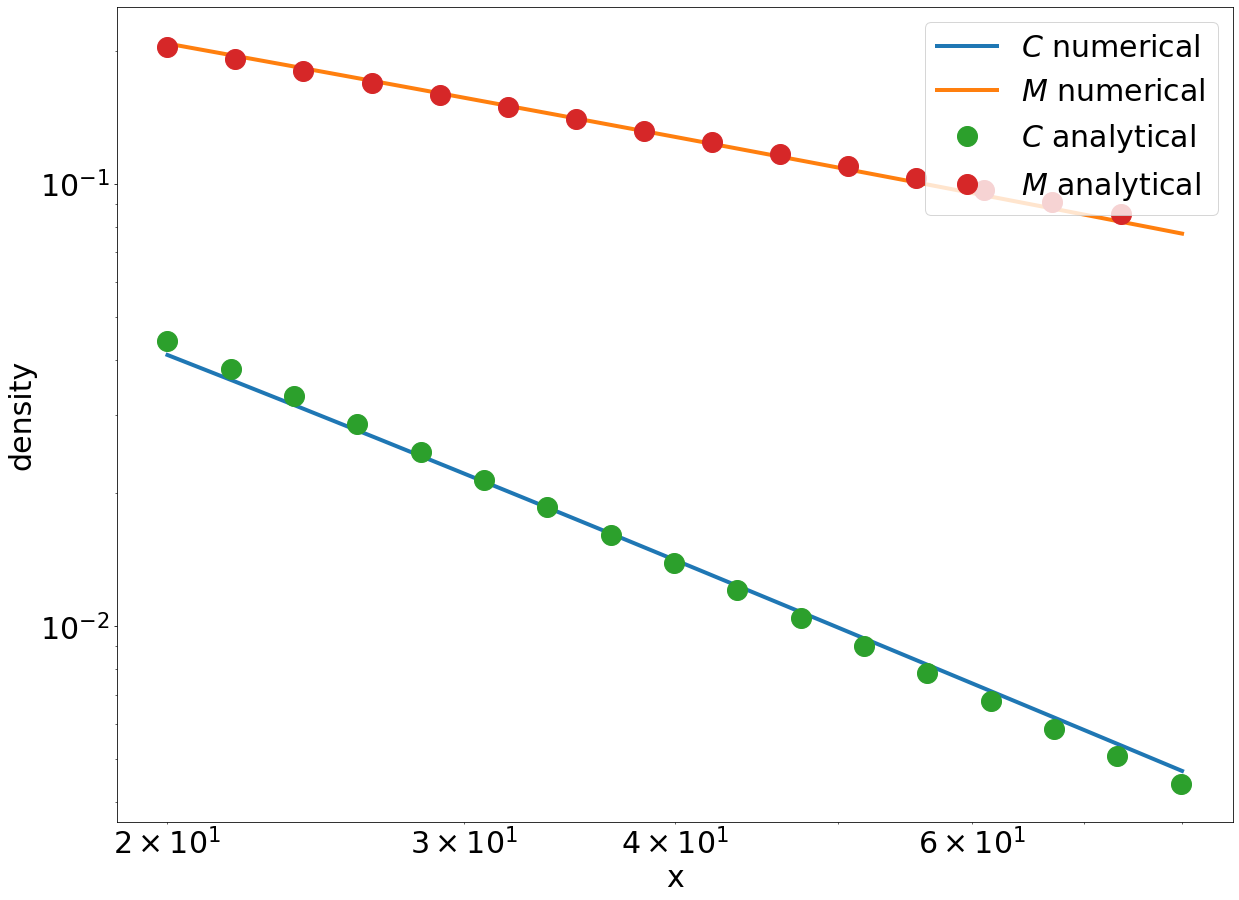

In [32]:
##### J = 1.0
V = 1.0
K = 1.0
x = np.linspace(0.000000001, 100, 5000)

time = t
lasty = -1000
firsty = 1000

#lasty=-1
#firsty=0

def c(x):
    return np.power(x, -5./3.)*6.5

def m(x):
    return np.power(x, -2./3.)*1.5
    
plt.figure(figsize=(20,15))

plt.plot(x[firsty:lasty], res[time][firsty:lasty].sum(axis=1), label='$C$ numerical', lw=4)
plt.plot(x[firsty:lasty], res_m[time][firsty:lasty].sum(axis=1), label='$M$ numerical', lw=4)
plt.plot(x[firsty:lasty], c(x[firsty:lasty]), 'o', label='$C$ analytical', lw=4, markersize=20, markevery=0.05)
plt.plot(x[firsty:lasty], m(x[firsty:lasty]), 'o', label='$M$ analytical', lw=4, markersize=20, markevery=0.05)

plt.xticks(fontsize=30)
ax = plt.gca()
ax.tick_params(axis='both', which='minor', labelsize=30)
plt.xlabel("x", fontsize=30)
plt.xscale('log')
plt.yticks(fontsize=30)
plt.ylabel("density", fontsize=30)
plt.yscale('log')
plt.legend(fontsize=30, loc='upper right')
plt.savefig("diffusion_advection_const.png")

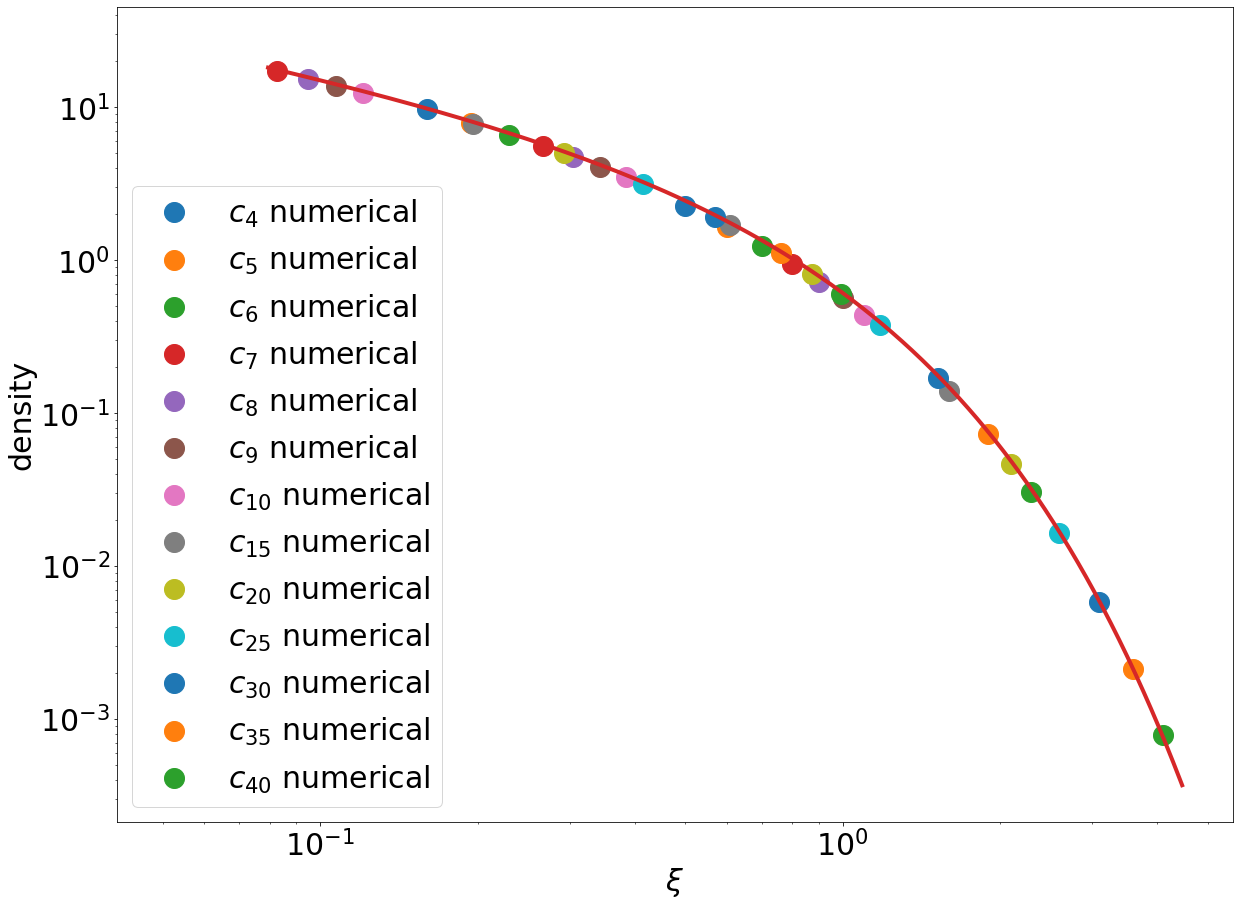

In [16]:
J = 1.0
V = 1.0
K = 1.0
x = np.linspace(0.000000001, 100, 5000)

time = t

lasty = -100
firsty = 500
#lasty=-1
#firsty=0

def formula(k, x, cond, sc=1.0):
    return f((k+1)/x, cond, sc)

def f(eps, cond, sc):
    if cond:
        return np.exp(-sc*np.power(eps, -2./3.))
    else:
        return np.power(eps, -2./3.)*np.exp(-sc*eps) 

plt.figure(figsize=(20,15))

plt.plot(5/x[firsty:lasty], res[time][firsty:lasty, 4]/np.power(x[firsty:lasty], -8./3.), 'o', label='$c_{4}$ numerical', lw=4, markersize=20, markevery=0.2)
plt.plot(6/x[firsty:lasty], res[time][firsty:lasty, 5]/np.power(x[firsty:lasty], -8./3.), 'o', label='$c_{5}$ numerical', lw=4, markersize=20, markevery=0.2)
plt.plot(7/x[firsty:lasty], res[time][firsty:lasty, 6]/np.power(x[firsty:lasty], -8./3.), 'o', label='$c_{6}$ numerical', lw=4, markersize=20, markevery=0.2)
plt.plot(8/x[firsty:lasty], res[time][firsty:lasty, 7]/np.power(x[firsty:lasty], -8./3.), 'o', label='$c_{7}$ numerical', lw=4, markersize=20, markevery=0.2)
plt.plot(9/x[firsty:lasty], res[time][firsty:lasty, 8]/np.power(x[firsty:lasty], -8./3.), 'o', label='$c_{8}$ numerical', lw=4, markersize=20, markevery=0.2)
plt.plot(10/x[firsty:lasty], res[time][firsty:lasty, 9]/np.power(x[firsty:lasty], -8./3.), 'o', label='$c_{9}$ numerical', lw=4, markersize=20, markevery=0.2)
plt.plot(11/x[firsty:lasty], res[time][firsty:lasty, 10]/np.power(x[firsty:lasty], -8./3.), 'o', label='$c_{10}$ numerical', lw=4, markersize=20, markevery=0.2)
plt.plot(16/x[firsty:lasty], res[time][firsty:lasty, 15]/np.power(x[firsty:lasty], -8./3.), 'o', label='$c_{15}$ numerical', lw=4, markersize=20, markevery=0.2)
plt.plot(21/x[firsty:lasty], res[time][firsty:lasty, 20]/np.power(x[firsty:lasty], -8./3.), 'o', label='$c_{20}$ numerical', lw=4, markersize=20, markevery=0.2)
plt.plot(26/x[firsty:lasty], res[time][firsty:lasty, 25]/np.power(x[firsty:lasty], -8./3.), 'o', label='$c_{25}$ numerical', lw=4, markersize=20, markevery=0.2)
plt.plot(31/x[firsty:lasty], res[time][firsty:lasty, 30]/np.power(x[firsty:lasty], -8./3.), 'o', label='$c_{30}$ numerical', lw=4, markersize=20, markevery=0.2)
plt.plot(36/x[firsty:lasty], res[time][firsty:lasty, 35]/np.power(x[firsty:lasty], -8./3.), 'o', label='$c_{35}$ numerical', lw=4, markersize=20, markevery=0.2)
plt.plot(41/x[firsty:lasty], res[time][firsty:lasty, 40]/np.power(x[firsty:lasty], -8./3.), 'o', label='$c_{40}$ numerical', lw=4, markersize=20, markevery=0.2)

line_x = np.logspace(-1.1, 0.65, 1000)
line = np.power(line_x, -2./3.)*np.exp(-1.85*line_x) * 3.9
plt.plot(line_x, line, lw=4)

plt.xticks(fontsize=30)
ax = plt.gca()
ax.tick_params(axis='both', which='minor', labelsize=30)
plt.xlabel("$\\xi$", fontsize=30)
plt.xscale('log')
plt.yticks(fontsize=30)
plt.ylabel("density", fontsize=30)
plt.yscale('log')
plt.legend(fontsize=30, loc='best')
plt.savefig("diffusion_advection_const.png")